In [1]:
import pandas as pd
import numpy as np
import math
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA                 # for dimensionality reduction using PCA
# from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns            # visualization tool
import matplotlib.cm as cm       # for colour mapping to use for the pca plots

In [2]:
def process_one_csv(file_name,k):
    data = pd.read_csv('/home/amaya/emp/Realtime-Sign-Language-Translation-to-Speech-DNN/all/User'+str(k)+'/'+file_name)
    global classes
    
    class_ = file_name[0:len(file_name)-14]
    
    # print(data.head(2))

    columns = list(data.columns)[1:]
    # features = ['MAV','RMS','VAR','SSI','MAX','MIN']
    
    vector = []
    # global out_columns
    
    for item in columns:
        temp = list(data[item])
        # calculating MAV ***
        # out_columns.append(item+features[0])
        abs_val = list(map(abs,temp))
        vector.append(np.mean(abs_val))

        # calculating RMS ***
        # out_columns.append(item+features[1])
        vector.append(np.sqrt(np.mean(np.array(temp)**2)))

        # calculate variance ***
        # out_columns.append(item+features[2])
        x_mean = np.mean(temp)
        dif = temp - x_mean
        vector.append(np.mean(np.array(dif)**2))

        # calculating ssi ***
        # out_columns.append(item+features[3])
        vector.append(np.sum(np.array(temp)**2))

        # calculating max ***
        # out_columns.append(item+features[4])
        vector.append(max(temp))

        # calculating min ***
        # out_columns.append(item+features[5])
        vector.append(min(temp))
        
    if class_ in classes:
        vector.append(classes.index(class_))
    else:
        classes.append(class_)
        vector.append(classes.index(class_))
        
    return vector


In [3]:
out_columns = ['EMG0LMAV', 'EMG0LRMS', 'EMG0LVAR', 'EMG0LSSI', 'EMG0LMAX', 'EMG0LMIN', 'EMG1LMAV', 'EMG1LRMS', 'EMG1LVAR', 'EMG1LSSI', 'EMG1LMAX', 'EMG1LMIN', 'EMG2LMAV', 'EMG2LRMS', 'EMG2LVAR', 'EMG2LSSI', 'EMG2LMAX', 'EMG2LMIN', 'EMG3LMAV', 'EMG3LRMS', 'EMG3LVAR', 'EMG3LSSI', 'EMG3LMAX', 'EMG3LMIN', 'EMG4LMAV', 'EMG4LRMS', 'EMG4LVAR', 'EMG4LSSI', 'EMG4LMAX', 'EMG4LMIN', 'EMG5LMAV', 'EMG5LRMS', 'EMG5LVAR', 'EMG5LSSI', 'EMG5LMAX', 'EMG5LMIN', 'EMG6LMAV', 'EMG6LRMS', 'EMG6LVAR', 'EMG6LSSI', 'EMG6LMAX', 'EMG6LMIN', 'EMG7LMAV', 'EMG7LRMS', 'EMG7LVAR', 'EMG7LSSI', 'EMG7LMAX', 'EMG7LMIN', 'AXLMAV', 'AXLRMS', 'AXLVAR', 'AXLSSI', 'AXLMAX', 'AXLMIN', 'AYLMAV', 'AYLRMS', 'AYLVAR', 'AYLSSI', 'AYLMAX', 'AYLMIN', 'AZLMAV', 'AZLRMS', 'AZLVAR', 'AZLSSI', 'AZLMAX', 'AZLMIN', 'GXLMAV', 'GXLRMS', 'GXLVAR', 'GXLSSI', 'GXLMAX', 'GXLMIN', 'GYLMAV', 'GYLRMS', 'GYLVAR', 'GYLSSI', 'GYLMAX', 'GYLMIN', 'GZLMAV', 'GZLRMS', 'GZLVAR', 'GZLSSI', 'GZLMAX', 'GZLMIN', 'ORLMAV', 'ORLRMS', 'ORLVAR', 'ORLSSI', 'ORLMAX', 'ORLMIN', 'OPLMAV', 'OPLRMS', 'OPLVAR', 'OPLSSI', 'OPLMAX', 'OPLMIN', 'OYLMAV', 'OYLRMS', 'OYLVAR', 'OYLSSI', 'OYLMAX', 'OYLMIN', 'EMG0RMAV', 'EMG0RRMS', 'EMG0RVAR', 'EMG0RSSI', 'EMG0RMAX', 'EMG0RMIN', 'EMG1RMAV', 'EMG1RRMS', 'EMG1RVAR', 'EMG1RSSI', 'EMG1RMAX', 'EMG1RMIN', 'EMG2RMAV', 'EMG2RRMS', 'EMG2RVAR', 'EMG2RSSI', 'EMG2RMAX', 'EMG2RMIN', 'EMG3RMAV', 'EMG3RRMS', 'EMG3RVAR', 'EMG3RSSI', 'EMG3RMAX', 'EMG3RMIN', 'EMG4RMAV', 'EMG4RRMS', 'EMG4RVAR', 'EMG4RSSI', 'EMG4RMAX', 'EMG4RMIN', 'EMG5RMAV', 'EMG5RRMS', 'EMG5RVAR', 'EMG5RSSI', 'EMG5RMAX', 'EMG5RMIN', 'EMG6RMAV', 'EMG6RRMS', 'EMG6RVAR', 'EMG6RSSI', 'EMG6RMAX', 'EMG6RMIN', 'EMG7RMAV', 'EMG7RRMS', 'EMG7RVAR', 'EMG7RSSI', 'EMG7RMAX', 'EMG7RMIN', 'AXRMAV', 'AXRRMS', 'AXRVAR', 'AXRSSI', 'AXRMAX', 'AXRMIN', 'AYRMAV', 'AYRRMS', 'AYRVAR', 'AYRSSI', 'AYRMAX', 'AYRMIN', 'AZRMAV', 'AZRRMS', 'AZRVAR', 'AZRSSI', 'AZRMAX', 'AZRMIN', 'GXRMAV', 'GXRRMS', 'GXRVAR', 'GXRSSI', 'GXRMAX', 'GXRMIN', 'GYRMAV', 'GYRRMS', 'GYRVAR', 'GYRSSI', 'GYRMAX', 'GYRMIN', 'GZRMAV', 'GZRRMS', 'GZRVAR', 'GZRSSI', 'GZRMAX', 'GZRMIN', 'ORRMAV', 'ORRRMS', 'ORRVAR', 'ORRSSI', 'ORRMAX', 'ORRMIN', 'OPRMAV', 'OPRRMS', 'OPRVAR', 'OPRSSI', 'OPRMAX', 'OPRMIN', 'OYRMAV', 'OYRRMS', 'OYRVAR', 'OYRSSI', 'OYRMAX', 'OYRMIN','CLASS']
# 205 columns (34*6 + 1)
output = []
classes=[]
# print(len(out_columns))

# process_one_csv(files[0])
for k in range(1,11):
    if(k!=5):
        files = os.listdir('/home/amaya/emp/Realtime-Sign-Language-Translation-to-Speech-DNN/all/User'+str(k)+'/')
    else:
        continue
    for file in files:
        if(file[-1] == 'v'):      # to avoid _DS_STORE files and anyother hiiden files
            output.append(process_one_csv(file,k))
        
processed = pd.DataFrame(output,columns = out_columns)
processed.shape

(550, 205)

In [4]:
#plt.hist(processed[out_columns[len(out_columns)-1]])
#plt.show()
#print(out_columns[len(out_columns)-1])

In [5]:
#temp = processed[out_columns[:len(out_columns)-1]]
#stds= []
#for ind in out_columns[:len(out_columns)-1]:
#    stds.append(np.std(processed[ind]))
#print(stds)
#lessthan = [stds.index(x) for x in stds if x<1] 
#print(len(lessthan))

In [6]:
# feature scaling of data
scaler = preprocessing.MinMaxScaler()   # since the data set is not gaussian
scaled_df = scaler.fit_transform(processed[out_columns[:len(out_columns)-1]])
X = pd.DataFrame(scaled_df, columns = out_columns[:len(out_columns)-1])
y = processed['CLASS']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)
svclassifier = SVC(kernel = 'rbf', C = 10.0, gamma = 0.1)
svclassifier.fit(X_train,y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
# dimensionality reduction to training set

'''pca = PCA(n_components = 2)
newFeatures = pca.fit_transform(X_train)
newdf = pd.DataFrame(newFeatures,columns = ['Principal Component 1', 'Principal Component 2'])
svclassifier.fit(newdf,y_train)
newdf['CLASS'] = list(y_train)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
clind = list(range(20))
colors = cm.rainbow(np.linspace(0, 1, 20))
for ind, color in zip(clind,colors):
    indicesToKeep = newdf['CLASS'] == ind
    ax.scatter(newdf.loc[indicesToKeep, 'Principal Component 1']
               , newdf.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)
ax.legend(clind)
ax.grid()'''

"pca = PCA(n_components = 2)\nnewFeatures = pca.fit_transform(X_train)\nnewdf = pd.DataFrame(newFeatures,columns = ['Principal Component 1', 'Principal Component 2'])\nsvclassifier.fit(newdf,y_train)\nnewdf['CLASS'] = list(y_train)\n\nfig = plt.figure(figsize = (8,8))\nax = fig.add_subplot(1,1,1) \nax.set_xlabel('Principal Component 1', fontsize = 15)\nax.set_ylabel('Principal Component 2', fontsize = 15)\nclind = list(range(20))\ncolors = cm.rainbow(np.linspace(0, 1, 20))\nfor ind, color in zip(clind,colors):\n    indicesToKeep = newdf['CLASS'] == ind\n    ax.scatter(newdf.loc[indicesToKeep, 'Principal Component 1']\n               , newdf.loc[indicesToKeep, 'Principal Component 2']\n               , c = color\n               , s = 50)\nax.legend(clind)\nax.grid()"

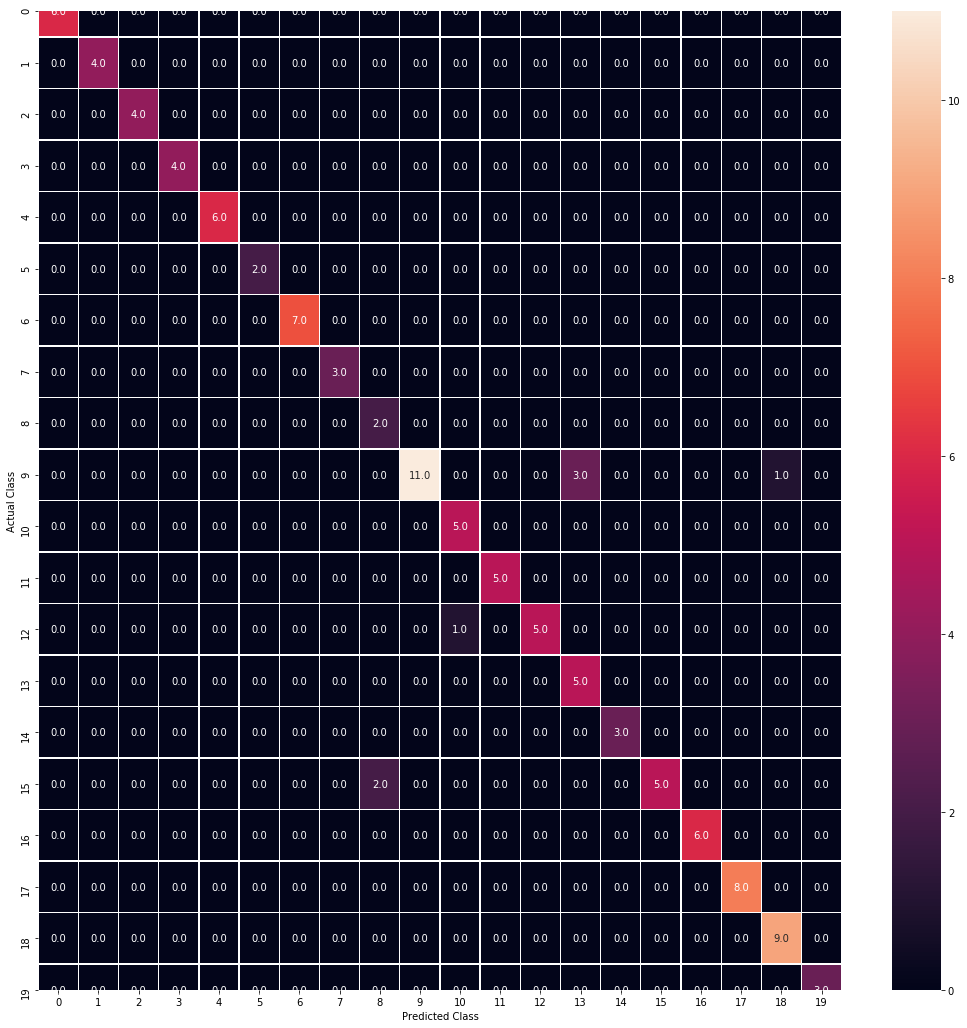

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         3
           8       0.50      1.00      0.67         2
           9       1.00      0.73      0.85        15
          10       0.83      1.00      0.91         5
          11       1.00      1.00      1.00         5
          12       1.00      0.83      0.91         6
          13       0.62      1.00      0.77         5
          14       1.00      1.00      1.00         3
          15       1.00      0.71      0.83         7
          16       1.00      1.00      1.00         6
          17       1.00    

In [9]:
# dimesionality reduction to test set
# newFeaturesTest = pca.fit_transform(X_test)
# newtest = pd.DataFrame(newFeaturesTest,columns = ['Principal Component 1', 'Principal Component 2'])
# ****************************************************************************************************

# Usual code:
y_pred = svclassifier.predict(X_test)
#result = [y_pred[i] == y_test[i] for i in range(len(y_test))]
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, linewidths=.3, fmt= '.1f',ax=ax)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(classification_report(y_test,y_pred))

In [10]:
# PCA plot for the test set
'''newtest['CLASS'] = list(y_pred)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
for ind, color in zip(clind,colors):
    indicesToKeep = newtest['CLASS'] == ind
    ax.scatter(newtest.loc[indicesToKeep, 'Principal Component 1']
               , newtest.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)
ax.legend(clind)
ax.grid()'''

"newtest['CLASS'] = list(y_pred)\n\nfig = plt.figure(figsize = (8,8))\nax = fig.add_subplot(1,1,1) \nax.set_xlabel('Principal Component 1', fontsize = 15)\nax.set_ylabel('Principal Component 2', fontsize = 15)\nfor ind, color in zip(clind,colors):\n    indicesToKeep = newtest['CLASS'] == ind\n    ax.scatter(newtest.loc[indicesToKeep, 'Principal Component 1']\n               , newtest.loc[indicesToKeep, 'Principal Component 2']\n               , c = color\n               , s = 50)\nax.legend(clind)\nax.grid()"

In [11]:
# print(classes)